# **Ch 0. 초기 설정 및 라이브러리 불러오기**

In [1]:
# 구글 드라이브로부터 데이터 불러오기
# from google.colab import drive
# drive.mount('/content/gdrive')

# 변수 저장/불러오기
import pickle

# 학습/평가 데이터 분할
from sklearn.model_selection import train_test_split

# 학습 결과 평가
from sklearn.metrics import mean_squared_error, r2_score

# 시각화
import matplotlib.pyplot as plt

In [ ]:
# %cd /..
# %cd content/gdrive/MyDrive/hanon_1st

# Additional command for the diriectory
# !pwd : 현재 directory 확인
# !ls  : 현재 directory 에서의 파일들 확인

In [2]:
# 변수 불러오기
with open("Heat_Exchanger_pp.pkl", "rb") as file:
    X_scaled, Y_scaled, scaler_X, scaler_Y = pickle.load(file)

# **Ch 1. Support Vector Regression (SVR)**

## Ch 1-1. 모델 생성 및 학습


In [3]:
# SVR 불러오기
from sklearn.svm import SVR

In [4]:
# 데이터를 학습용과 테스트용으로 분리
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)

In [ ]:
# print(X_scaled_train.shape)
# print(Y_scaled_train.shape)
# Y_scaled_train = Y_scaled_train.reshape(-1, )
# print(Y_scaled_train.shape)

# print(X_scaled_test.shape)
# print(Y_scaled_test.shape)
# print(X_scaled.shape)
# print(Y_scaled.shape)
# print(scaler_X)
# print(scaler_Y)
# scaler_X
# scaler_Y
# print(X_scaled_train)
# X_scaled_train
# print(Y_scaled_train)
# Y_scaled_train

In [6]:
# SVR 학습
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
svm_model = SVR(kernel='linear')
#svm_model = SVR(kernel='rbf')
# Default parameters for SVR
# svm_model = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
svm_model.fit(X_scaled_train, Y_scaled_train.ravel())

SVR(kernel='linear')

## Ch 1-2. 모델 평가

In [7]:
# 학습된 SVR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = svm_model.predict(X_scaled_train)
Y_scaled_test_pred = svm_model.predict(X_scaled_test)

In [8]:
# SVR 학습 성능 평가
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

MSE_train: 0.003878530295481313
R-squared_train: 0.9960693483000913
MSE_test: 0.003947372389024714
R-squared_test: 0.9961166740453817


()
()


array([-0.57282904, -0.88252122, -1.27363675, -1.31125126, -0.99720223,
        0.49304701,  0.46565479,  2.07517949,  0.18084022,  0.81691711,
       -1.23532551, -0.01509606, -1.00945139, -0.84797166,  2.40971242,
        0.8261466 , -1.24638399,  1.76373745, -0.63074858,  0.29025622,
        0.56586886, -0.86472895, -0.64997143, -0.67715594,  0.5955721 ,
       -0.6516934 ,  0.78145864,  1.1308753 , -0.73142026,  0.56609894,
        0.18381973, -1.08842198, -1.08128354,  0.78846551, -1.17402685,
       -1.01739954,  0.59319403, -1.13076998, -1.26200249, -1.05206805,
       -0.06812572, -0.0498611 , -0.86124018,  0.29240871, -0.73015983,
        0.52179689, -1.02723913, -0.55533726, -1.02698239, -1.00028309,
        0.42354105, -0.98084424, -0.8484485 ,  0.26092132, -0.60517577,
       -0.82520541,  0.31081204, -1.28463771,  1.60159702,  1.58056584,
        0.7684417 , -0.57012049,  0.40109501, -0.85170692, -1.0564562 ,
        0.04063314,  0.7974594 , -1.06609014, -1.13974124, -0.65

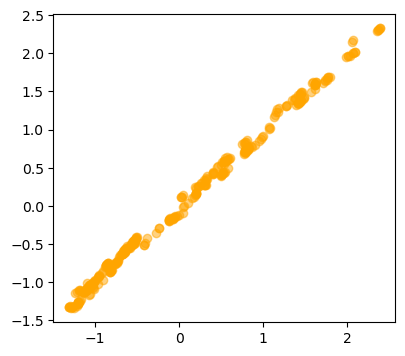

In [31]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)

# x=y 그리기

min_val = min(min(Y_scaled_test_pred.ravel()), min(Y_scaled_test.ravel())) # ravel() 추가 = reshape(-1) 과 동일 한 것 같음
# print(min_val.shape)
# min_val = min_val.reshape(-1, )
# print(min_val.shape)
# print(max_val.shape)

max_val = max(max(Y_scaled_test_pred.ravel()), max(Y_scaled_test.ravel())) # ravel() 추가 = reshape(-1) 과 동일 한 것 같음
# print(max_val.shape)
# max_val = max_val.reshape(-1, )
# print(max_val.shape)

print(min_val.shape)
print(max_val.shape)
min_val, max_val

Y_scaled_test_pred
# Y_scaled_test
Y_scaled_test_pred.ravel()
# Y_scaled_test.ravel()

# plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# # plot
# plt.title("Support Vector Regression")
# plt.xlabel("Predicted value")
# plt.ylabel("Actual value")
# plt.legend(['Test dataset','x=y'])


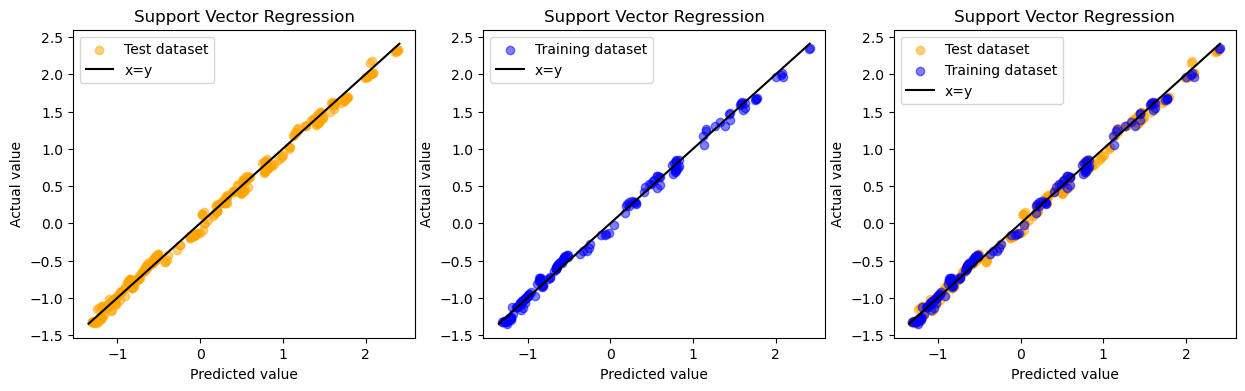

In [19]:
# 예측 값과 실제 값 비교를 위한 데이터 준비 (reshape(-1)로 fix)
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
max_val = max_val.reshape(-1, ) # 수정

plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
max_val = max_val.reshape(-1, ) # 수정

plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
max_val = max_val.reshape(-1, ) # 수정

plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

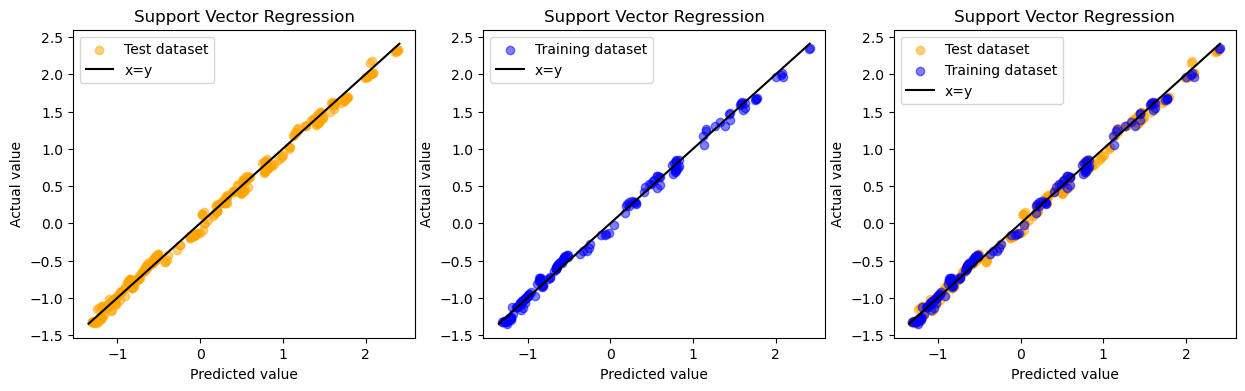

In [23]:
# 예측 값과 실제 값 비교를 위한 데이터 준비 (ravel() 로 fix)
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test.ravel()))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test.ravel()))
# max_val = max_val.reshape(-1, ) # 수정

plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test.ravel()))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test.ravel()))
# max_val = max_val.reshape(-1, ) # 수정

plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test.ravel()))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test.ravel()))
# max_val = max_val.reshape(-1, ) # 수정

plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

# **Ch 2. Random Forest Regression (RFR)**


## Ch 2-1. 모델 생성 및 학습

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rfr_model = RandomForestRegressor(n_estimators=5)
# rfr_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)[source]

rfr_model.fit(X_scaled_train, Y_scaled_train.ravel())

RandomForestRegressor(n_estimators=5)

## Ch 2-2. 모델 평가

In [35]:
# 학습된 RFR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = rfr_model.predict(X_scaled_train)
Y_scaled_test_pred = rfr_model.predict(X_scaled_test)

In [36]:
# RFR 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# RFR 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

MSE_train: 0.00034470545217447766
R-squared_train: 0.9996506622435989
MSE_test: 0.0009775127486249947
R-squared_test: 0.9990383474743199


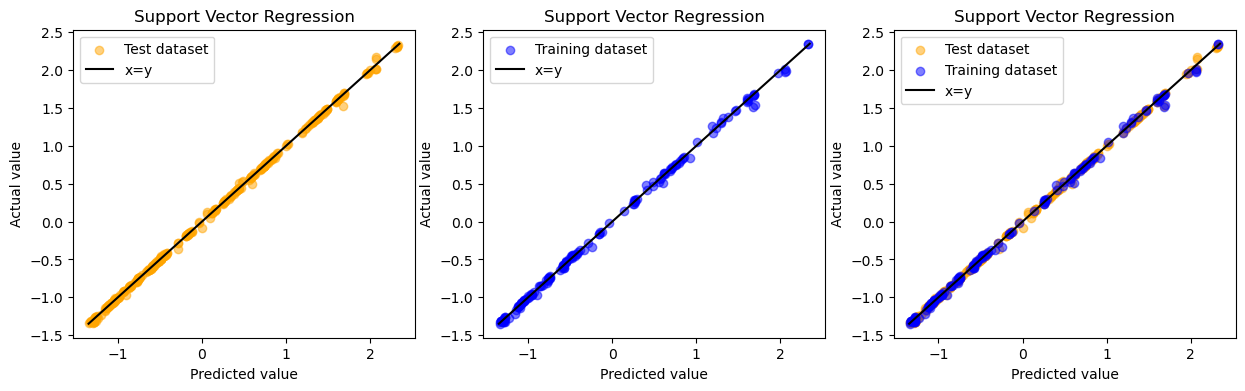

In [37]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

## Ch 2-3. 결정트리 시각화

In [ ]:
# 결정트리 시각화
import graphviz
from sklearn import tree

In [ ]:
# 개별 트리 시각화
for i, estimator in enumerate(rfr_model.estimators_):
    dot_data = tree.export_graphviz(estimator, out_file=None,
                                    filled=True, rounded=True,
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.view(filename=f"tree2_{i+1}")

In [ ]:
display(graphviz.Source(dot_data))

# **Ch 3. Deep Neural Network (DNN)**


## Ch 3-1. 모델 생성 및 학습

In [38]:
import tensorflow as tf

In [39]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_scaled_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
dnn_model.compile(loss='mean_squared_error', optimizer='adam')

hist=dnn_model.fit(X_scaled_train, Y_scaled_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
12/12 [==============================] - 0s 2ms/step - loss: 1.4681
Epoch 2/50
12/12 [==============================] - 0s 1ms/step - loss: 0.4059
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.1107
Epoch 4/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 5/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0178
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 7/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 8/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 9/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 10/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 11/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 12/50
12/12 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 13/50
12/12 [==============================

## Ch 3-2. 모델 평가

In [40]:
# 학습된 DNN을 활용하여 테스트 셋 예측
Y_scaled_train_pred = dnn_model.predict(X_scaled_train)
Y_scaled_test_pred = dnn_model.predict(X_scaled_test)

5/5 [==============================] - 0s 997us/step


In [41]:
# DNN 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# DNN 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

MSE_train: 0.0004247723068217258
R-squared_train: 0.9995695194151691
MSE_test: 0.0007995314736966613
R-squared_test: 0.9992134409887516


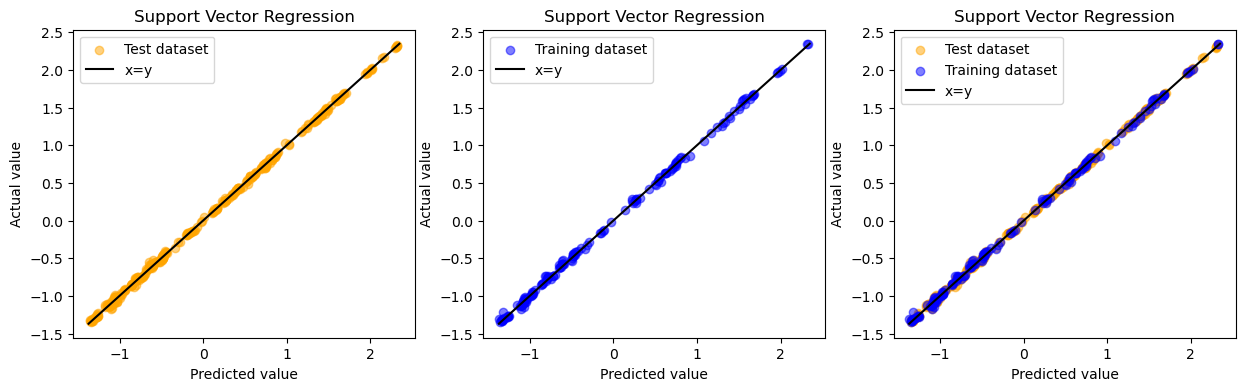

In [42]:
# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

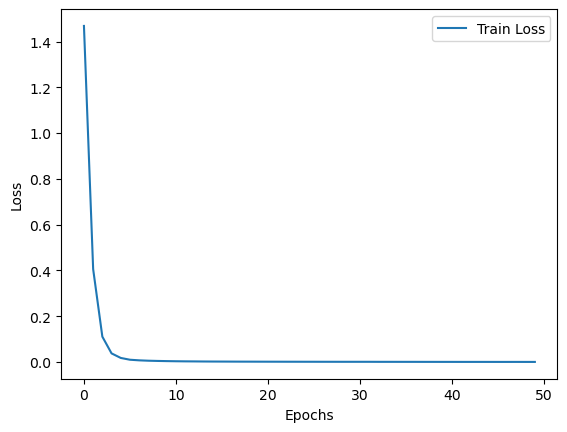

In [43]:
# 손실 그래프
plt.plot(hist.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()